In [1]:
print("test")

test


# <div style="text-align: center; background-color:#60ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">Heart Disease Prediction</div>

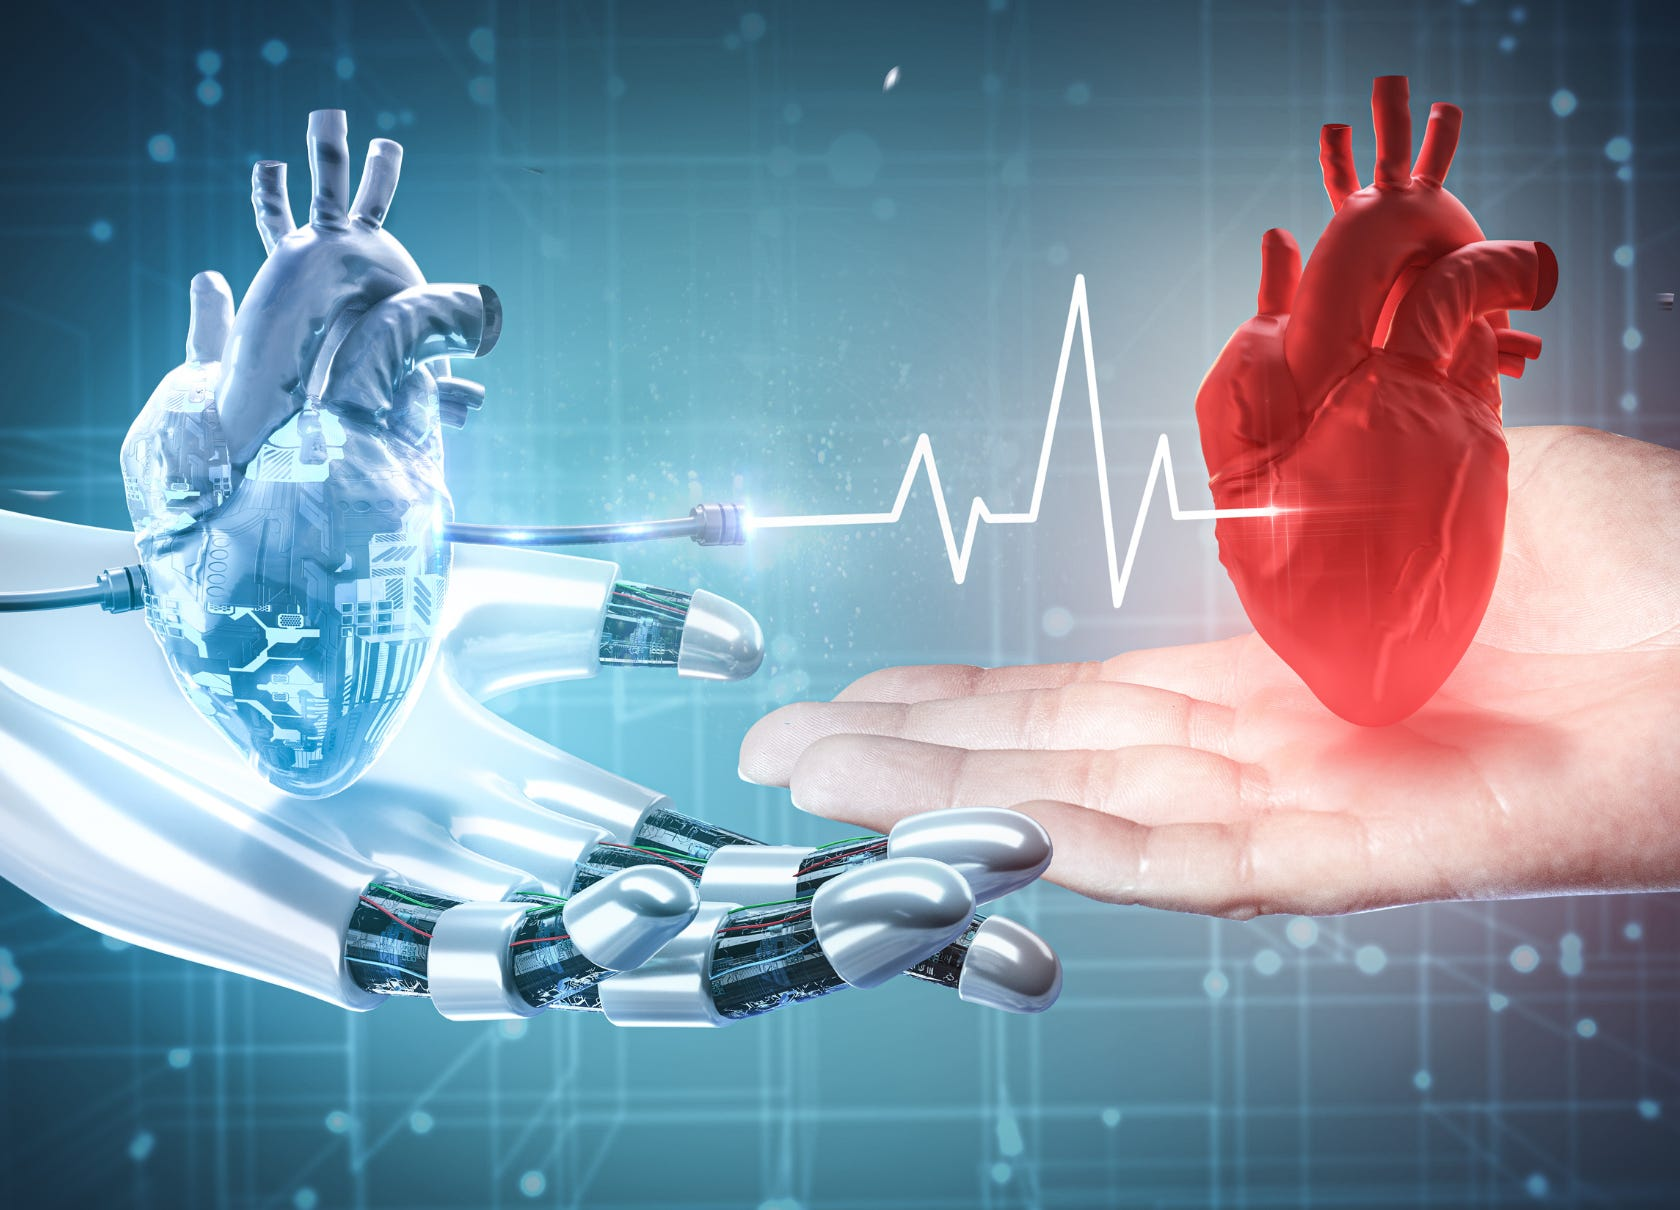

# Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Loading

In [3]:
data=pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [4]:
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# About Dataset
* This heart disease dataset is curated by combining 5 popular heart disease datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes.
* The five datasets used for its curation are:
    *   Cleveland
    *   Hungarian
    *   Switzerland
    *   Long Beach VA


> Statlog (Heart) Data Set.
This dataset consists of 1190 instances with 11 features. These datasets were collected and combined at one place to help advance research on CAD-related machine learning and data mining algorithms, and hopefully to ultimately advance clinical diagnosis and early treatment.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

Cleaned data : No null values

In [8]:
# checking unique values
for i in data.columns:
    print(i,':',data[i].nunique())

age : 50
sex : 2
chest pain type : 4
resting bp s : 67
cholesterol : 222
fasting blood sugar : 2
resting ecg : 3
max heart rate : 119
exercise angina : 2
oldpeak : 53
ST slope : 4
target : 2


# **Exploratory Data Analysis**

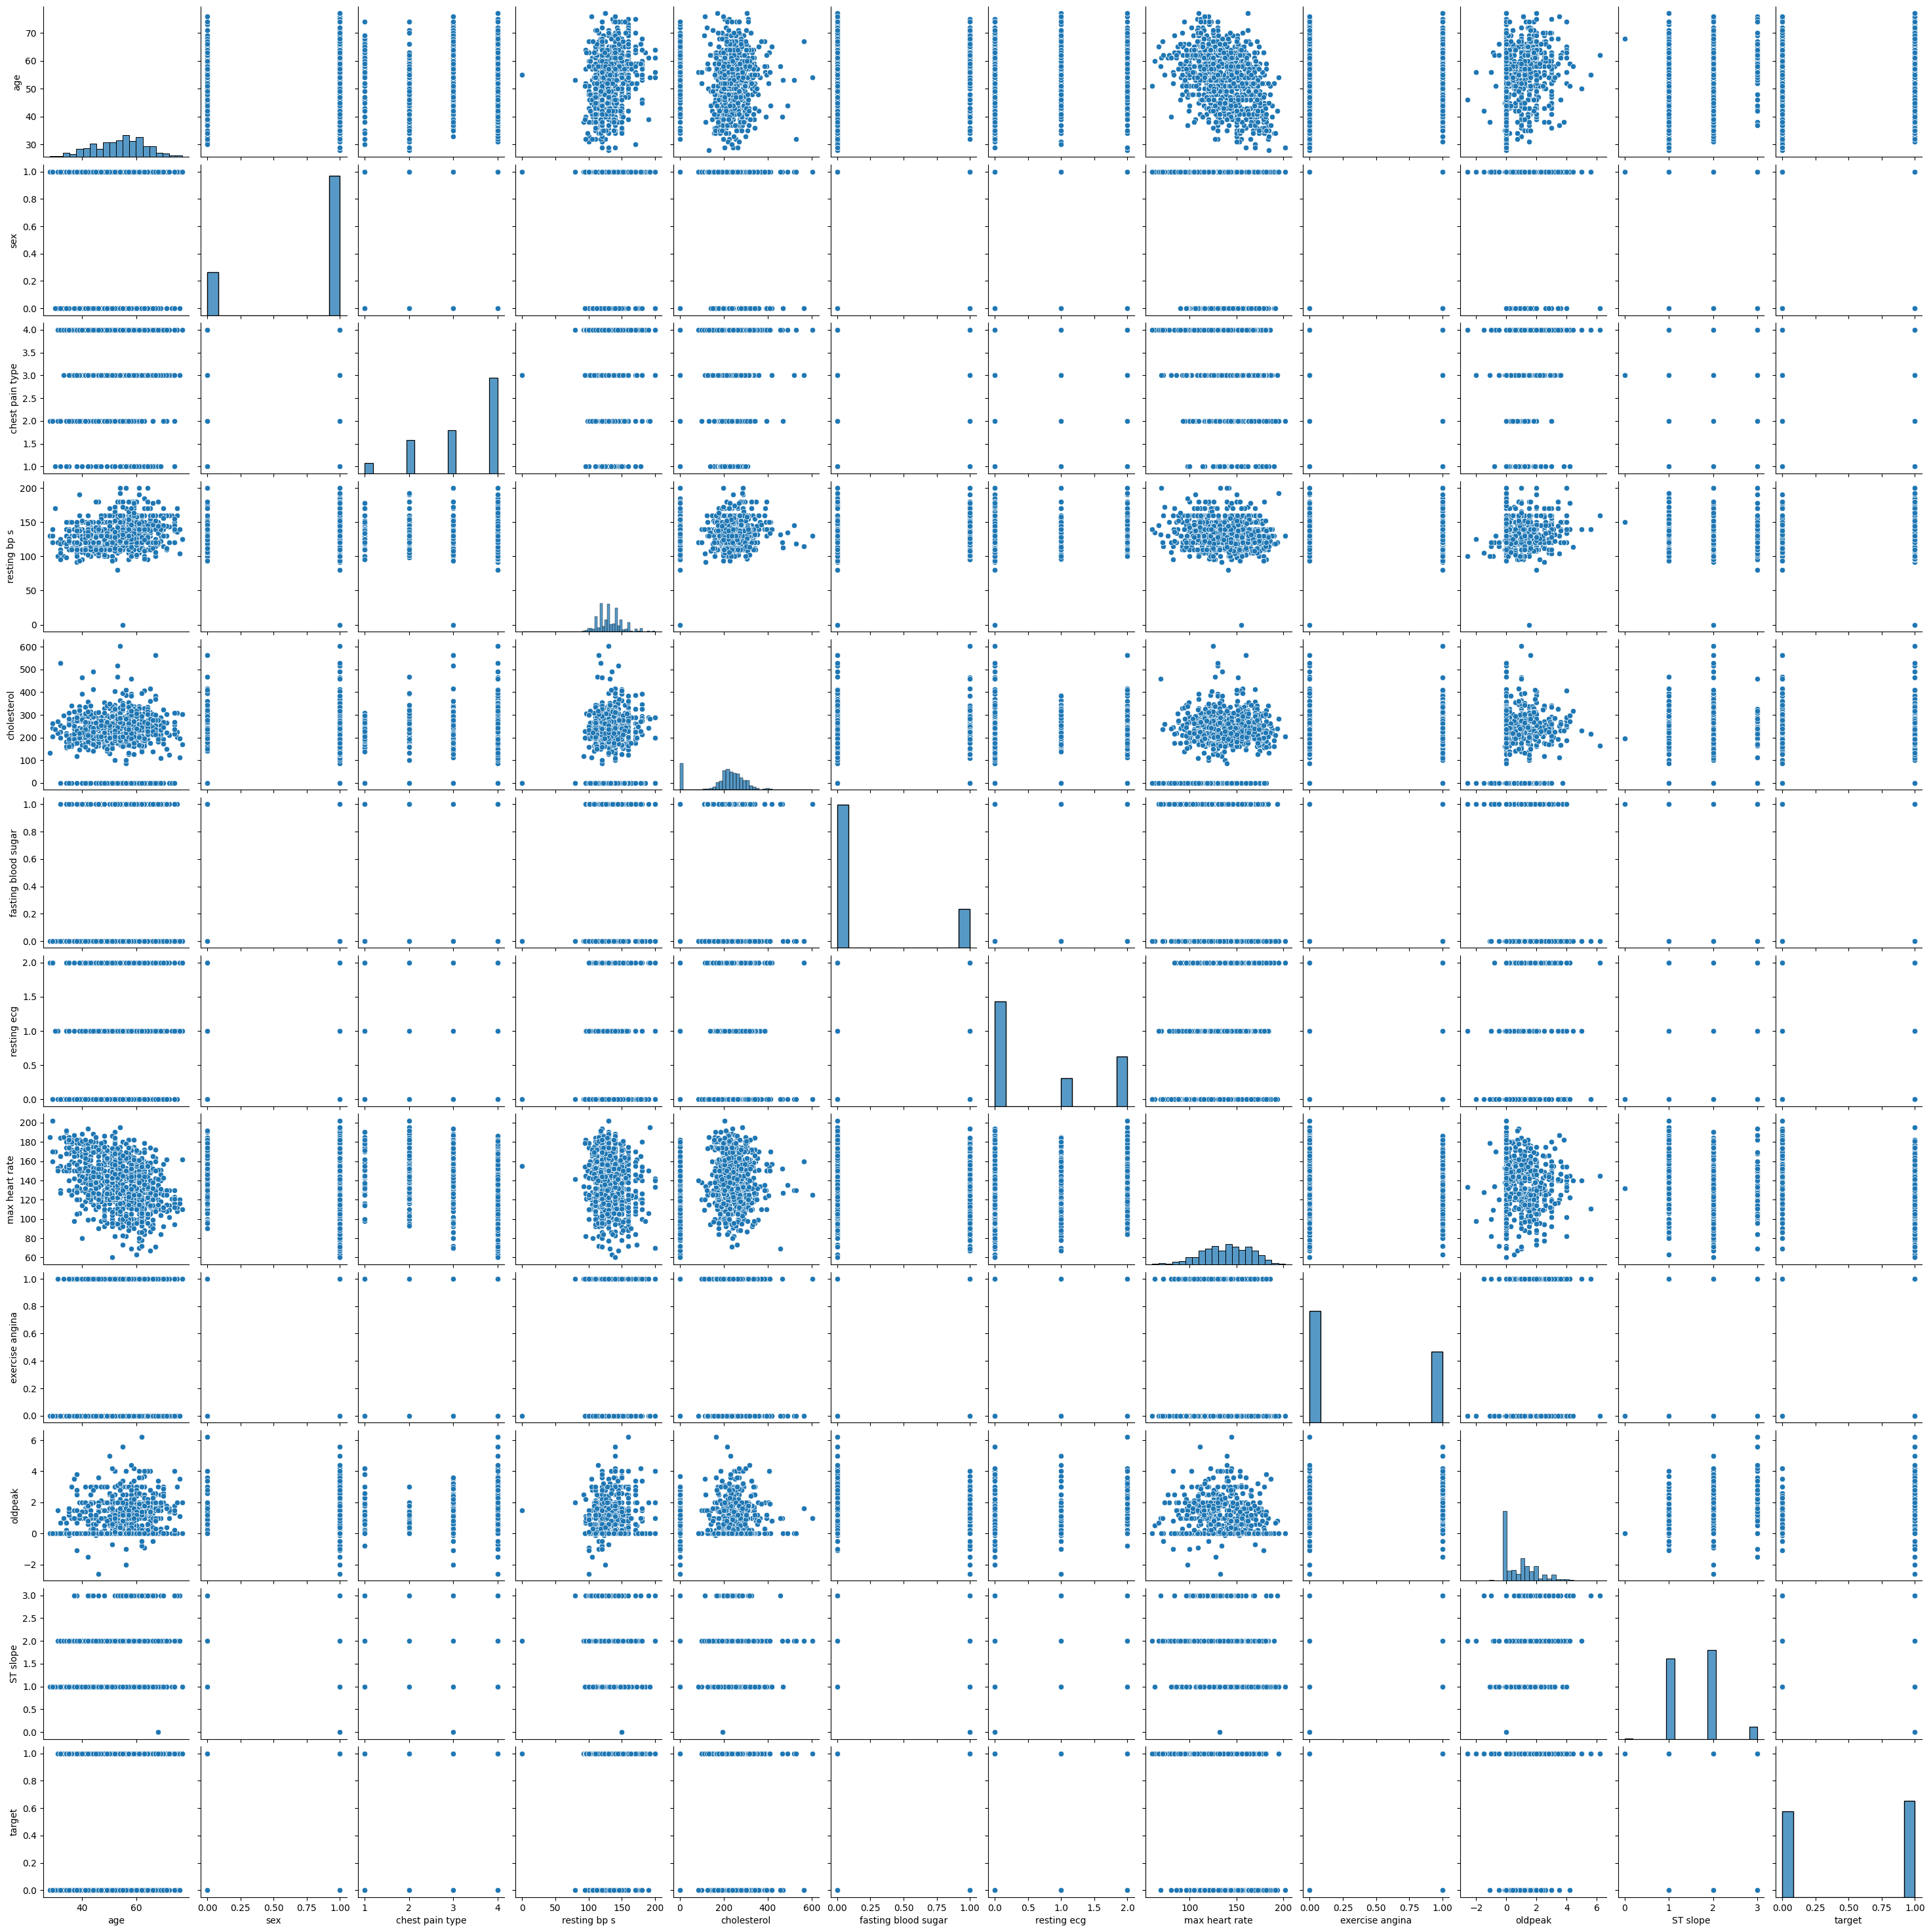

In [9]:
sns.pairplot(data)

In [10]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

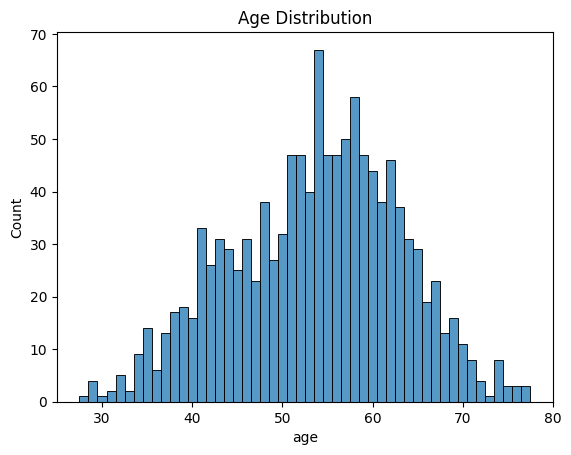

In [11]:
sns.histplot(x='age',data=data,discrete=True)
plt.title('Age Distribution')
plt.show()

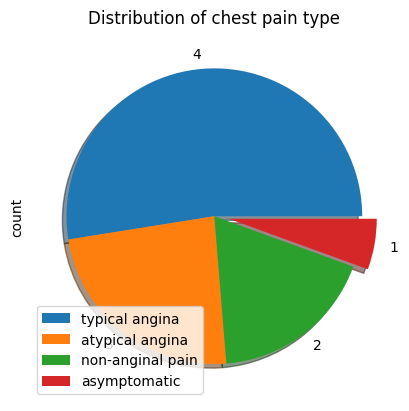

In [12]:
data['chest pain type'].value_counts().plot(kind='pie',shadow=True,explode=(0,0,0,0.1))
plt.legend(labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'], loc='best')
plt.title('Distribution of chest pain type')
plt.show()

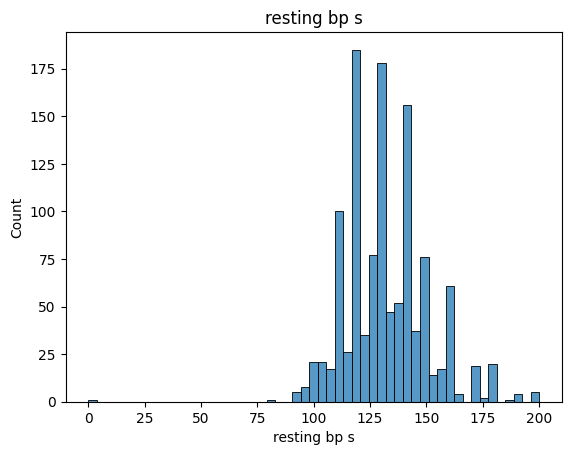

In [13]:
sns.histplot(x='resting bp s',data=data)
plt.title('resting bp s')
plt.show()

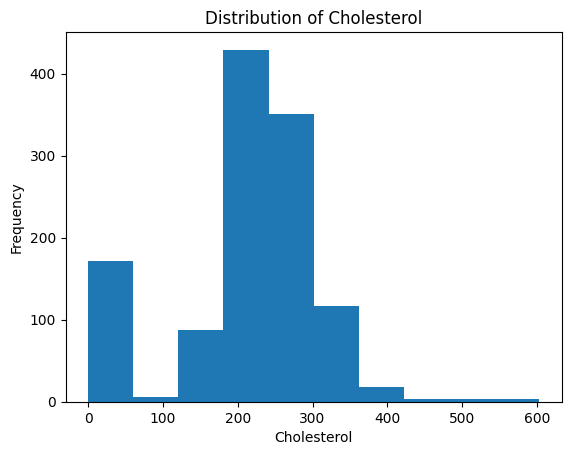

In [14]:
plt.hist(data['cholesterol'],)

# Add labels and title
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol')

# Display the plot
plt.show()

In [15]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

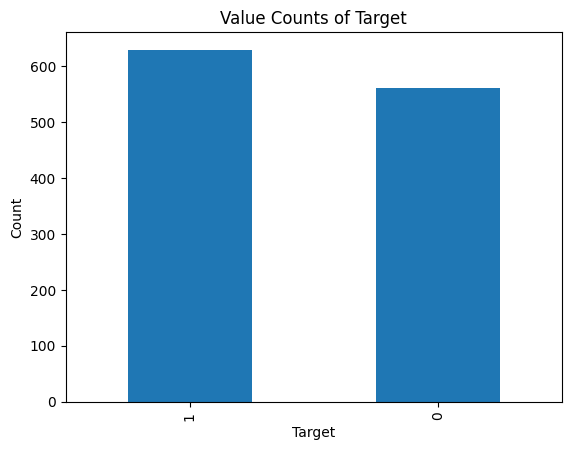

In [16]:
target_counts = data['target'].value_counts()

# Create a bar plot
target_counts.plot.bar()

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Value Counts of Target')

# Display the plot
plt.show()

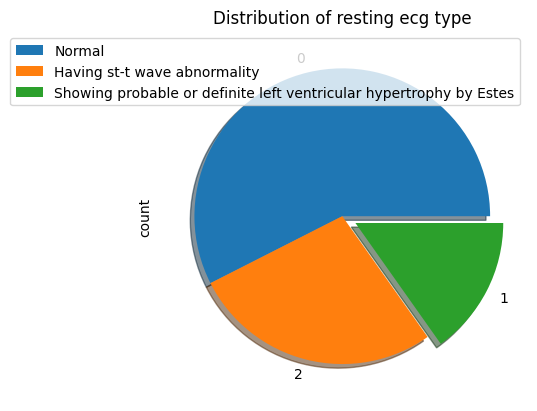

In [17]:
data['resting ecg'].value_counts().plot(kind='pie',shadow=True,explode=(0,0,0.1))
plt.legend(labels=['Normal', 'Having st-t wave abnormality', 'Showing probable or definite left ventricular hypertrophy by Estes'], loc='best')
plt.title('Distribution of resting ecg type')
plt.show()

# **Import Libraries for model building**

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

ModuleNotFoundError: No module named 'sklearn'

In [18]:
x=data.drop('target',axis=1)

In [19]:
y=data['target']

In [20]:
# Spliting dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train

In [ ]:
# Building Model
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

In [23]:
y_pred=rfc.predict(x_test)

In [24]:
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [ ]:
accuracy

In [ ]:
print("Classification Report:")
print(report)